In [1]:
import os
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

from   vmaxer import vmaxer
from   astropy.table import Table
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo import distmod

In [2]:
gama = Table.read(os.environ['CSCRATCH'] + '/norberg/GAMA4/gama_gold.fits')
gama

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64
585589,588848899914203328,183.48064782,-0.15822451,19.453074,0.18341,4,G12_Y6_057_054,5,21.894562,20.52974,19.453663,18.945805,18.579258,627.2877281170306,38.987333956711154
585591,588848899914203338,183.49789499,-0.16766405,17.603594,0.12429,5,323176188157650944,6,19.758217,18.387272,17.65539,17.203344,16.9255,408.83891632496017,38.05776114234527
585592,588848899914203383,183.46286329,-0.08433424,18.439117,0.179,4,G12_Y3_022_187,6,21.375816,19.530548,18.330122,17.764397,17.359926,610.4904174319889,38.92839425713693
585600,588848899914203456,183.42823656,-0.02442331,19.335196,0.12242,4,G12_Y1_GND1_018,6,20.904034,19.648397,19.229986,18.944212,18.885782,402.17133436591314,38.02205556041388
585603,588848899914203511,183.50219516,-0.16954766,19.42929,0.08914,4,G12_Y3_022_170,5,20.404564,19.604887,19.355776,19.150723,19.380806,286.07271379559756,37.282382179394425
585607,588848899914268848,183.60160175,-0.18627266,18.615673,0.18484,4,G12_Y6_057_048,6,19.831152,19.083632,18.618288,18.319872,18.317358,632.7514193386862,39.00616564003465
585606,588848899914268827,183.57423313,-0.07826632,17.959646,0.24766,5,4330342247851098112,6,22.035128,19.377728,17.913776,17.397978,17.044468,880.8085931674992,39.724407714803846
585610,588848899914268877,183.63570571,-0.18036312,18.865356,0.20493,4,G12_Y1_HN1_145,6,20.803123,19.725954,18.848455,18.497477,18.334072,710.3851067380509,39.25746923929414


In [3]:
gama_kE = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_kE_20k.fits')
gama_kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,,mag,,,,,,,,mag,,,,mag,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float32,float64,int64,int64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64
585589,588848899914203328,183.48064782,-0.15822451,19.453074,0.18341,4,G12_Y6_057_054,5,21.894562,20.52974,19.453663,18.945805,18.579258,627.2877281170306,38.987333956711154,1.0760765,0.8610029493925443,0,6,-0.004304008086476699,0.2107695500893384,0.2234659946412858,0.5710036633045628,0.7285388389050824,0.8,-0.1779077,-0.14672801,-19.57981874445852,-19.61099844078001,39.032892246045435,39.06407194236692
585591,588848899914203338,183.49789499,-0.16766405,17.603594,0.12429,5,323176188157650944,6,19.758217,18.387272,17.65539,17.203344,16.9255,408.83891632496017,38.05776114234527,0.7318821,0.6893753080282159,0,4,-0.0819652807509548,-0.03945849344225659,0.14069395795487755,0.2577107115998888,0.6148653416919028,2.12,-0.1205613,-0.2634948,-20.47429997229798,-20.33136648440583,38.07789379859193,37.93496031069978
585592,588848899914203383,183.46286329,-0.08433424,18.439117,0.179,4,G12_Y3_022_187,6,21.375816,19.530548,18.330122,17.764397,17.359926,610.4904174319889,38.92839425713693,1.2004261,0.9721022317088284,0,6,0.0058391854325142295,0.23416305540825627,0.2365374787937211,0.6269925037399601,0.8099710767383314,0.8,-0.17363001,-0.14320001,-20.552184290228098,-20.58261429422876,38.99130172186872,39.02173172586939
585600,588848899914203456,183.42823656,-0.02442331,19.335196,0.12242,4,G12_Y1_GND1_018,6,20.904034,19.648397,19.229986,18.944212,18.885782,402.17133436591314,38.02205556041388,0.41841125,0.3893481424147275,0,3,-0.10094461324771158,-0.07188150077962656,0.08028614792542539,0.12193705781293117,0.37676034499530675,2.12,-0.1187474,-0.2595304,-18.648398768700215,-18.507615771688076,37.983594310082054,37.842811313069916
585603,588848899914203511,183.50219516,-0.16954766,19.42929,0.08914,4,G12_Y3_022_170,5,20.404564,19.604887,19.355776,19.150723,19.380806,286.07271379559756,37.282382179394425,0.24911118,0.25921542614595333,0,2,-0.10249707668751229,-0.11260132729635533,0.06318190720727612,0.04488036604559115,0.26741271669879435,2.12,-0.0864658,-0.18897678,-17.82980751679894,-17.72729653553721,37.25909828828331,37.15658730702158
585607,588848899914268848,183.60160175,-0.18627266,18.615673,0.18484,4,G12_Y6_057_048,6,19.831152,19.083632,18.618288,18.319872,18.317358,632.7514193386862,39.00616564003465,0.46534348,0.3271754608358587,0,2,-0.12224092872758091,0.0159270857783622,0.04929777637773486,0.1910928313923645,0.32354842032716724,2.12,-0.1792948,-0.39186075,-20.260495556428943,-20.047929597929034,38.87616862161449,38.66360266311458
585606,588848899914268827,183.57423313,-0.07826632,17.959646,0.24766,5,4330342247851098112,6,22.035128,19.377728,17.913776,17.397978,17.044468,880.8085931674992,39.724407714803846,1.4639511,1.0187620089417166,0,6,0.1152454090575456,0.5604345109556725,0.35103175304364315,0.9608665324449894,0.8541163314384974,0.8,-0.2402302,-0.198128,-21.875563040197036,-21.91766524297013,39.83520926517262,39.87731146794572
585610,588848899914268877,183.63570571,-0.18036312,18.865356,0.20493,4,G12_Y1_HN1_145,6,20.803123,19.725954,18.848455,18.497477,18.334072,710.3851067380509,39.25746923929414,0.8774986,0.6616306307163672,0,4,-0.027243027797297995,0.1886249681953192,0.1935241661150005,0.4755138903473121,0.5955089024766728,2.12,-0.1987821,-0.43445155,-20.386854858823103,-20.151185409851355,39.2522113041356,39.01654185516385


In [4]:
gama_zmax = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_zmax_5k.fits')
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,,mag,,,,,,,,mag,,,,mag,mag,,,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float32,float64,int64,int64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
585589,588848899914203328,183.48064782,-0.15822451,19.453074,0.18341,4,G12_Y6_057_054,5,21.894562,20.52974,19.453663,18.945805,18.579258,627.2877281170306,38.987333956711154,1.0760765,0.8610029493925443,0,6,-0.004304008086476699,0.2107695500893384,0.2234659946412858,0.5710036633045628,0.7285388389050824,0.8,-0.1779077,-0.14672801,-19.57981874445852,-19.61099844078001,39.032892246045435,39.06407194236692,0.34692574,0.2135815896356721,0.0,-7.4530735,0.006958905023123419,0.0
585591,588848899914203338,183.49789499,-0.16766405,17.603594,0.12429,5,323176188157650944,6,19.758217,18.387272,17.65539,17.203344,16.9255,408.83891632496017,38.05776114234527,0.7318821,0.6893753080282159,0,4,-0.0819652807509548,-0.03945849344225659,0.14069395795487755,0.2577107115998888,0.6148653416919028,2.12,-0.1205613,-0.2634948,-20.47429997229798,-20.33136648440583,38.07789379859193,37.93496031069978,2.1964054,0.2925854475254422,0.0,-5.603594,0.009662334364330054,0.0
585592,588848899914203383,183.46286329,-0.08433424,18.439117,0.179,4,G12_Y3_022_187,6,21.375816,19.530548,18.330122,17.764397,17.359926,610.4904174319889,38.92839425713693,1.2004261,0.9721022317088284,0,6,0.0058391854325142295,0.23416305540825627,0.2365374787937211,0.6269925037399601,0.8099710767383314,0.8,-0.17363001,-0.14320001,-20.552184290228098,-20.58261429422876,38.99130172186872,39.02173172586939,1.3608818,0.3052763085763087,0.0,-6.4391174,0.010852458684350953,0.0
585600,588848899914203456,183.42823656,-0.02442331,19.335196,0.12242,4,G12_Y1_GND1_018,6,20.904034,19.648397,19.229986,18.944212,18.885782,402.17133436591314,38.02205556041388,0.41841125,0.3893481424147275,0,3,-0.10094461324771158,-0.07188150077962656,0.08028614792542539,0.12193705781293117,0.37676034499530675,2.12,-0.1187474,-0.2595304,-18.648398768700215,-18.507615771688076,37.983594310082054,37.842811313069916,0.4648037,0.14150820215174065,0.0,-7.3351955,0.004195379248694529,0.0
585603,588848899914203511,183.50219516,-0.16954766,19.42929,0.08914,4,G12_Y3_022_170,5,20.404564,19.604887,19.355776,19.150723,19.380806,286.07271379559756,37.282382179394425,0.24911118,0.25921542614595333,0,2,-0.10249707668751229,-0.11260132729635533,0.06318190720727612,0.04488036604559115,0.26741271669879435,2.12,-0.0864658,-0.18897678,-17.82980751679894,-17.72729653553721,37.25909828828331,37.15658730702158,0.37070847,0.10060097212514917,0.0,-7.429291,0.002932327618386287,0.0
585607,588848899914268848,183.60160175,-0.18627266,18.615673,0.18484,4,G12_Y6_057_048,6,19.831152,19.083632,18.618288,18.319872,18.317358,632.7514193386862,39.00616564003465,0.46534348,0.3271754608358587,0,2,-0.12224092872758091,0.0159270857783622,0.04929777637773486,0.1910928313923645,0.32354842032716724,2.12,-0.1792948,-0.39186075,-20.260495556428943,-20.047929597929034,38.87616862161449,38.66360266311458,1.1843262,0.28865454755066683,0.0,-6.615673,0.008490765793436486,0.0
585606,588848899914268827,183.57423313,-0.07826632,17.959646,0.24766,5,4330342247851098112,6,22.035128,19.377728,17.913776,17.397978,17.044468,880.8085931674992,39.724407714803846,1.4639511,1.0187620089417166,0,6,0.1152454090575456,0.5604345109556725,0.35103175304364315,0.9608665324449894,0.8541163314384974,0.8,-0.2402302,-0.198128,-

In [5]:
gama_zmax['ZGAMA'].min()

0.03968

In [6]:
gama_vmax = vmaxer(gama_zmax, 0.04, 0.25, 60.)
gama_vmax

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/astropy/cosmology/core.py:1250: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  f = lambda z1, z2: quad(self._inv_efunc_scalar, z1, z2,
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/lib/function_base.py:2192: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


ZGAMA,ZMIN,ZMAX,VMAX,VZ
float32,float64,float64,float64,float64
0.18341,0.04,0.2135815896356721,444132.98040014616,285552.9306185213
0.12429,0.04,0.25,697508.1807447155,89983.10175775546
0.179,0.04,0.25,697508.1807447155,265965.50413567445
0.12242,0.04,0.14150820215174065,132904.50124347082,85939.09611586282
0.08914,0.04,0.10060097212514917,46897.370201010446,31872.371708054416
0.18484,0.04,0.25,697508.1807447155,292093.8274157014
0.24766,0.04,0.25,697508.1807447155,679055.5375870923
0.20493,0.04,0.25,697508.1807447155,394134.33969730075
0.24567,0.04,0.25,697508.1807447155,663604.5752403243


Text(0.5, 0, 'ZMAX')

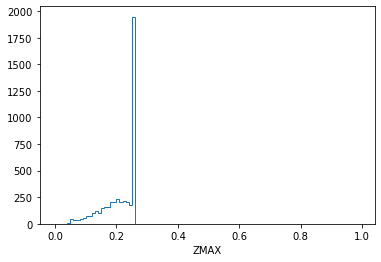

In [7]:
_ = pl.hist(gama_vmax['ZMAX'], bins=np.arange(0.0, 1.0, 0.01), histtype='step')

pl.xlabel('ZMAX')

Text(0.5, 0, 'ZMIN')

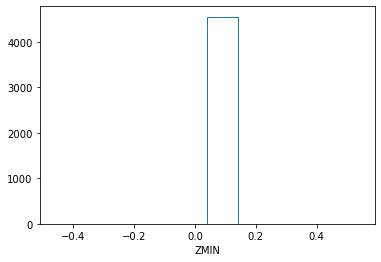

In [8]:
_ = pl.hist(gama_vmax['ZMIN'], histtype='step')

pl.xlabel('ZMIN')

Text(0, 0.5, 'ZMAX')

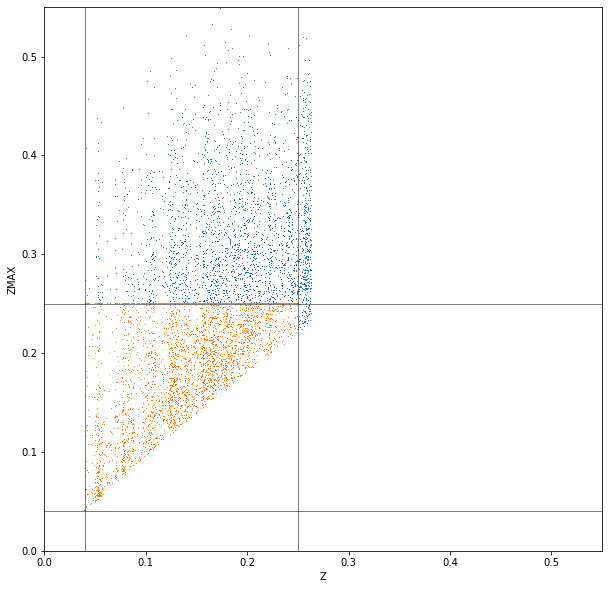

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(gama_zmax['ZGAMA'], gama_zmax['ZMAX'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZGAMA'], gama_vmax['ZMAX'], marker=',', lw=0.0)

ax.axvline(0.04, c='k', lw=0.5) 
ax.axvline(0.25, c='k', lw=0.5) 

ax.axhline(0.04, c='k', lw=0.5) 
ax.axhline(0.25, c='k', lw=0.5) 

ax.set_xlim(0.0, 0.55)
ax.set_ylim(0.0, 0.55)

ax.set_xlabel('Z')
ax.set_ylabel('ZMAX')

Text(0.5, 0, '(V/VMAX)')

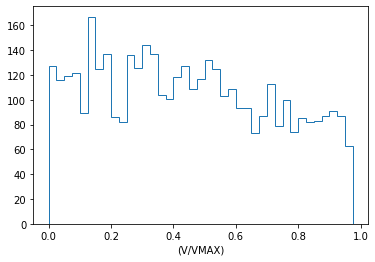

In [15]:
_ = pl.hist(gama_vmax['VZ'] / gama_vmax['VMAX'], bins=np.arange(0.0, 1.0, 0.025), histtype='step')

pl.xlabel('(V/VMAX)')

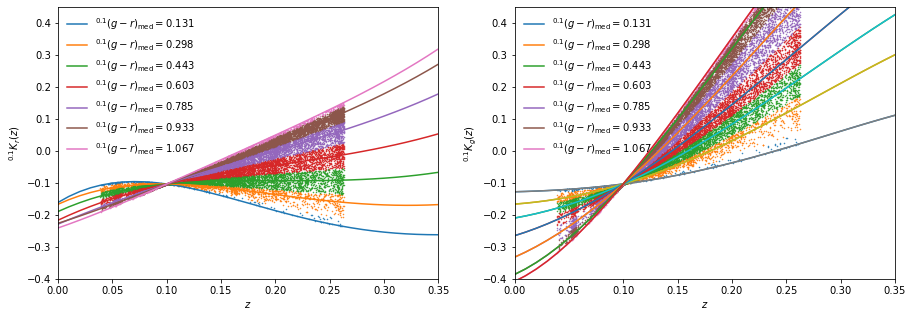

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

test_plots(axes)

for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx
      
    n_in = np.count_nonzero(isin)
        
    axes[0].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_R0P1'][isin], s=0.25)
    axes[1].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_G0P1'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.35)
    axes[1].set_xlim(0, 0.35)

    axes[0].set_ylim(-0.4, 0.45)
    axes[1].set_ylim(-0.4, 0.45)
    
axes[0].legend(ncol=1, frameon=False, loc=2)

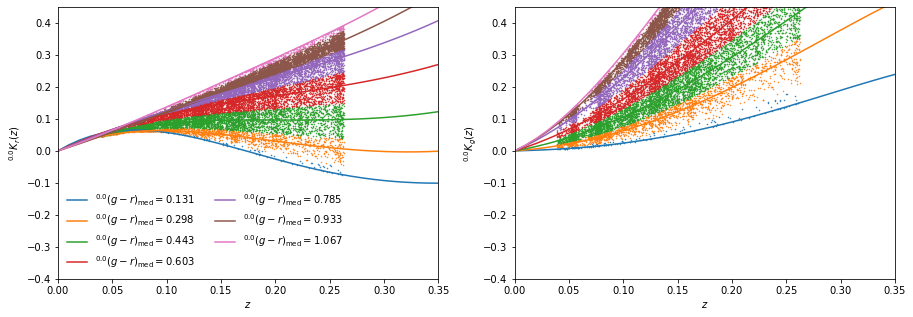

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

test_nonnative_plots(axes, 0.0)

for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx
        
    axes[0].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_R0P0'][isin], s=0.25)
    axes[1].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_G0P0'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.35)
    axes[1].set_xlim(0, 0.35)

    axes[0].set_ylim(-0.4, 0.45)
    axes[1].set_ylim(-0.4, 0.45)
    
axes[0].legend(ncol=2, frameon=False, loc=3)

Text(0, 0.5, '$\\theta(z)$')

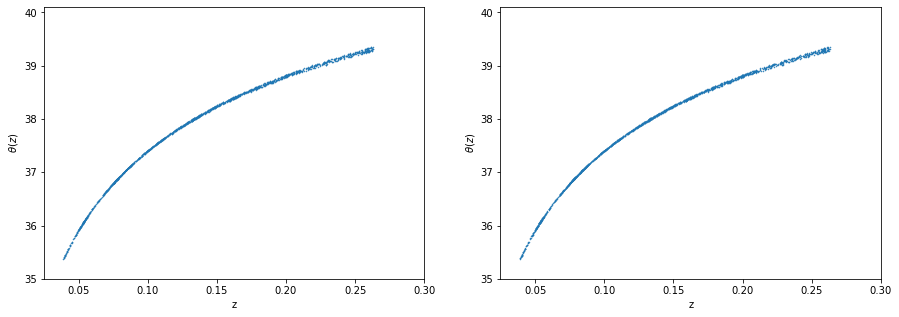

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX'])[1:]:
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx
        
    axes[0].scatter(gama_kE['ZGAMA'][isin], gama_kE['ZMAX_THETA_COLOR'][isin], s=0.25)
    axes[1].scatter(gama_kE['ZGAMA'][isin], gama_kE['ZMAX_THETA_COLOR'][isin], s=0.25)
    
    axes[0].set_xlim(0.025, 0.30)
    axes[1].set_xlim(0.025, 0.30)

    axes[0].set_ylim(35., 40.1)
    axes[1].set_ylim(35., 40.1)
    
    break
        
axes[0].set_xlabel('z')
axes[1].set_xlabel('z')

axes[0].set_ylabel(r'$\theta(z)$')
axes[1].set_ylabel(r'$\theta(z)$')

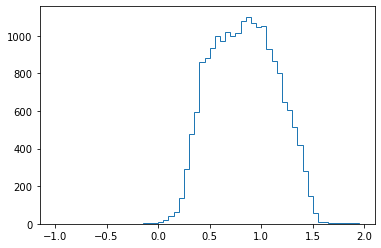

In [17]:
_ = pl.hist(gama_kE['GMR'], histtype='step', bins=np.arange(-1.0, 2.0, 0.05))

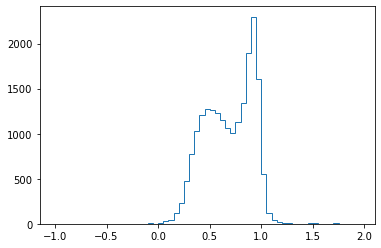

In [18]:
_ = pl.hist(gama_kE['REST_GMR_0P1'], histtype='step', bins=np.arange(-1.0, 2.0, 0.05))

In [19]:
np.unique(gama_kE['REST_GMR_0P1_WARN'].data)

array([0, 1, 2])

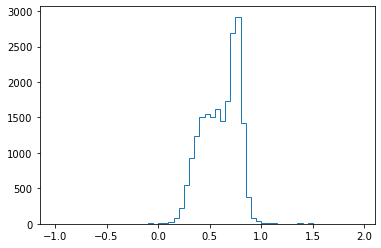

In [20]:
_ = pl.hist(gama_kE['REST_GMR_0P0'], histtype='step', bins=np.arange(-1.0, 2.0, 0.05))

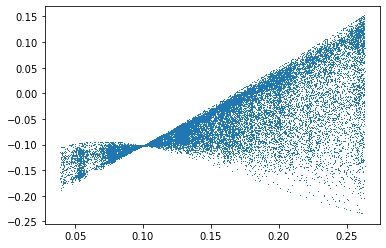

In [21]:
pl.plot(gama_kE['ZGAMA'], gama_kE['KCORR_R0P1'], marker=',', lw=0.0)

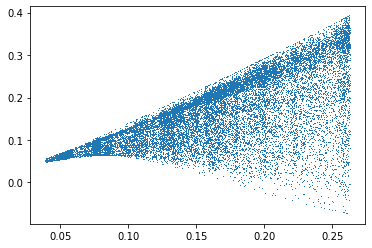

In [22]:
pl.plot(gama_kE['ZGAMA'], gama_kE['KCORR_R0P0'], marker=',', lw=0.0)

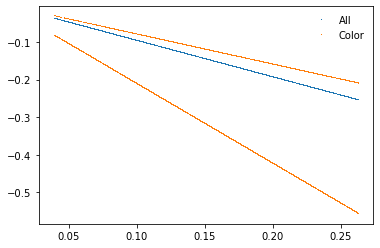

In [23]:
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_ALL_0P0'], marker=',', lw=0.0, label='All')
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_COLOR_0P0'], marker=',', lw=0.0, label='Color')

pl.legend(frameon=False)

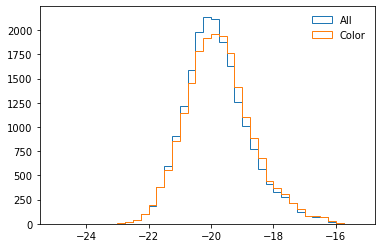

In [24]:
_ = pl.hist(gama_kE['MALL_0P0'], histtype='step', bins=np.arange(-25., -15.0, 0.25), label='All')
_ = pl.hist(gama_kE['MCOLOR_0P0'], histtype='step', bins=np.arange(-25., -15.0, 0.25), label='Color')

pl.legend(frameon=False)

/global/u2/m/mjwilson/desi/BGS/Sam/DESI/cosmo.py:11: RuntimeWarning: divide by zero encountered in log10
  return 5. * np.log10(cosmo.luminosity_distance(zs).value) + 25.


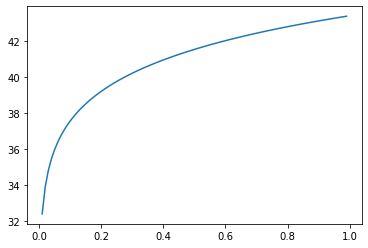

In [25]:
zs = np.arange(0.0, 1.0, 0.01)
mus = distmod(zs)

pl.plot(zs, mus)

# Done.